In [ ]:
from nbdev import *

In [ ]:
%nbdev_default_export experiment

Cells will be exported to experiment_utils.experiment,
unless a different module is specified after an export flag: `%nbdev_export special.module`


# experiment
> Helper utils for track and manage Dl experimets with pytorch and fastai.

In [ ]:
%nbdev_export
from fastai.basics import *
from torchvision.models import *

from experiment_utils.data_imagenette import *
from experiment_utils.utils import *
from experiment_utils.ranger import *

# class Parameters

In [ ]:
%nbdev_export
class Parameters(dict):
    """Base for storage Parameters"""
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        for key, value in self.items():
            if type(value) is dict:
#                 self[key] = Parameters(value)
                value = Parameters(value)
            self[key] = value
    
    

    def __setitem__(self, key, item):
        if type(item) is dict:
            item = Parameters(item)
        super().__setitem__(key, item)
        self.__dict__[key] = item

    __setattr__ = __setitem__
    __delattr__ = dict.__delitem__
    

# Optimizer dict

In [ ]:
%nbdev_export
# Dictionary defaults optimizers parameters
opt_dict = {'adam': {'func': optim.Adam,
                     'params': {'betas': (0.95, 0.99), 'eps': 1e-6}},
            'ranger': {'func': Ranger,
                       'params': {'betas': (0.95, 0.99), 'eps': 1e-6}}}
opt_parameters = Parameters(opt_dict)

In [ ]:
opt_dict

{'adam': {'func': torch.optim.adam.Adam,
  'params': {'betas': (0.95, 0.99), 'eps': 1e-06}},
 'ranger': {'func': experiment_utils.ranger.Ranger,
  'params': {'betas': (0.95, 0.99), 'eps': 1e-06}}}

In [ ]:
opt_parameters

{'adam': {'func': torch.optim.adam.Adam,
  'params': {'betas': (0.95, 0.99), 'eps': 1e-06}},
 'ranger': {'func': experiment_utils.ranger.Ranger,
  'params': {'betas': (0.95, 0.99), 'eps': 1e-06}}}

In [ ]:
opt_parameters.ranger.params

{'betas': (0.95, 0.99), 'eps': 1e-06}

In [ ]:
opt_parameters.ranger.params.betas

(0.95, 0.99)

In [ ]:
opt_parameters.__dict__

{'adam': {'func': torch.optim.adam.Adam,
  'params': {'betas': (0.95, 0.99), 'eps': 1e-06}},
 'ranger': {'func': experiment_utils.ranger.Ranger,
  'params': {'betas': (0.95, 0.99), 'eps': 1e-06}}}

In [ ]:
opt_parameters.adam.params

{'betas': (0.95, 0.99), 'eps': 1e-06}

# Parameters

# Data

In [ ]:
%nbdev_export
# data default parameters
data_params = {  'size': 128,
                 'woof': 1,
                 'bs': 64,
                 'augm': 'min',
                 'workers': None,}
data_parameters = Parameters(data_params)

In [ ]:
data_parameters

{'size': 128, 'woof': 1, 'bs': 64, 'augm': 'min', 'workers': None}

In [ ]:
data_parameters.size

128

In [ ]:
default_data_parameters = Parameters(param_parser(get_data))
default_data_parameters

{'size': 128, 'woof': 1, 'bs': 64, 'augm': 'min', 'workers': None}

In [ ]:
default_data_parameters.size

128

# Experiment Parameters

In [ ]:
# export
class ExperimentParameters:
#     def __init__(self, data=data_params):
    def __init__(self, data=data_parameters):
        self.exp_name:  str = 'noname'
        self.pipeline = [train_fc]
        self.data = data
    # Learner part
        self.model     = partial(resnet18, num_classes=10)
#         self.model     = {'name': 'resnet50', 
#                           'params': {'num_classes':10}}
        self.loss_func = LabelSmoothingCrossEntropy
        self.metrics   = [accuracy]
        self.wd      = 1e-2
        self.bn_wd   = False
        self.true_wd = True
        self.callback_fns = []
    # train 
        self.epochs     = 5
        self.lr         = 0.01
        self.mixup = 0.
    # FOC - Fit One Circle
        self.div_factor = 10
        self.moms       = (0.95, 0.85)
        self.pct_start  = 0.3
        self.final_div  = None
    # optimizer
#         self.opt_name = 'adam'
        self.opt_name = 'ranger'
        self.set_opt(self.opt_name)
    # sched
        self.fc_start_pct = 0.72
        self.fc_lr_final_div = 1e2
        self.shift=0.1

    def set_opt(self, opt_name):
        self.opt_name = opt_name
        self.opt_func = opt_dict[self.opt_name]['func'] 
        self.opt_params = opt_dict[self.opt_name]['params']
        self.opt_def_params = param_parser(self.opt_func)
    
    def get_opt(self):
        return partial(self.opt_func, **self.opt_params)
        
    opt = property(get_opt, set_opt)
    
    
    def __repr__(self):
        return f"params: exp:{self.exp_name}"

In [ ]:
# export
p = ExperimentParameters()

In [ ]:
p

params: exp:noname

In [ ]:
p.data

{'size': 128, 'woof': 1, 'bs': 64, 'augm': 'min', 'workers': None}

In [ ]:
p.data.size

128

In [ ]:
%nbdev_hide
# def name - arch name + base parameters + datetime

In [ ]:
p.opt

functools.partial(<class 'experiment_utils.ranger.Ranger'>, betas=(0.95, 0.99), eps=1e-06)

In [ ]:
p.opt_params

{'betas': (0.95, 0.99), 'eps': 1e-06}

In [ ]:
p.opt_params

{'betas': (0.95, 0.99), 'eps': 1e-06}

In [ ]:
p.opt_def_params

{'lr': 0.001,
 'alpha': 0.5,
 'k': 6,
 'N_sma_threshhold': 5,
 'betas': (0.95, 0.999),
 'eps': 1e-05,
 'weight_decay': 0}

In [ ]:
p.exp_name

'noname'

In [ ]:
%nbdev_hide
p.opt_name
p.opt

functools.partial(<class 'experiment_utils.ranger.Ranger'>, betas=(0.95, 0.99), eps=1e-06)

In [ ]:
%nbdev_hide
p.opt, p.opt_name, p.opt_params

(functools.partial(<class 'experiment_utils.ranger.Ranger'>, betas=(0.95, 0.99), eps=1e-06),
 'ranger',
 {'betas': (0.95, 0.99), 'eps': 1e-06})

In [ ]:
p.opt = 'adam'

In [ ]:
p.opt, p.opt_name

(functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.95, 0.99), eps=1e-06),
 'adam')

In [ ]:
p.opt_params

{'betas': (0.95, 0.99), 'eps': 1e-06}

In [ ]:
p.opt_def_params

{'lr': 0.001,
 'betas': (0.9, 0.999),
 'eps': 1e-08,
 'weight_decay': 0,
 'amsgrad': False}

# Learner

In [ ]:
%nbdev_export
def get_learner(p=p):
# def get_learner():
#     global p
    data = get_data(**p.data)
    learn = Learner(data, p.model(),  
                opt_func=p.opt,
                metrics=p.metrics, 
                wd=p.wd, bn_wd=p.bn_wd, true_wd=p.true_wd,
                loss_func=p.loss_func(), callback_fns=p.callback_fns)
    learn.p = p
    if learn.p.mixup: learn = learn.mixup(alpha=learn.p.mixup)

    return learn

In [ ]:
learn = get_learner()

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [ ]:
learn.p.data

{'size': 128, 'woof': 1, 'bs': 64, 'augm': 'min', 'workers': None}

In [ ]:
%nbdev_hide
learn.data.path

PosixPath('/root/.fastai/data/imagewoof2')

# Experiment

In [ ]:
%nbdev_export
class Experiment:
    def __init__(self, p=p):
        self.p = p
#         self.p.pipeline = [train]

    def get_learner(self):
        self.l = get_learner(self.p)    
     
    @property 
    def learn(self): 
        "Learner, same as l" 
        return self.l
       
    def lr_f(self, repeat_times=1, new_learner=True):
        for i in range(repeat_times):
            if new_learner or not hasattr(self, 'l'): self.get_learner()
            print(f"run {i+1} of {repeat_times}")
            lr_f(self.l)
            
    def train(self, repeat_times=1, new_learner=False):
        self.train_res = []
        self.train_rec = []
        for i in range(repeat_times):
            print(f"repeat {i+1} of {repeat_times}")
            if new_learner or not hasattr(self, 'l'): self.get_learner()
            for f in self.p.pipeline:
                f(self.l)
#             self.train_rec.append(self.l.recorder.get_state())
            self.train_res.append(e.l.recorder.metrics[-1][0].item()) # only first metric!
    
    def plot(self, plot_all=True):
        self.l.plot(plot_all)
    
    def __call__(self,repeat_times=1, new_learner=True):
        self.lr_list = listify(self.p.lr)
        num = len(self.lr_list)
        self.result = {}
        self.result_repr = {}
        for n, lr in enumerate(self.lr_list):
            self.p.lr = lr
            print(f"run {n+1} of {num}, lr {lr}")
            self.train(repeat_times, new_learner)
            self.result[str(lr)] = self.train_res
            res_repr = self.get_res_repr(lr)
            print(res_repr)
            print(20*'-')
            self.result_repr[str(lr)] = res_repr
        self.p.lr = self.lr_list
    
    def get_res_repr(self, lr):
        res_repr = f"{lr}: "
        if len(self.train_res)>1:
            arr = np.array(self.train_res)
            res_repr += f"mean {arr.mean():0.4f} std {arr.std():0.4f} -- "
        for i in self.train_res:
            res_repr += f"{i:0.4f}, "
        return res_repr
    
    def print_results(self):
        for i in self.result_repr:
            print(self.result_repr[i])

            
e = Experiment()

In [ ]:
e.p

params: exp:noname

In [ ]:
e.p.data

{'size': 128, 'woof': 1, 'bs': 64, 'augm': 'min', 'workers': None}

In [ ]:
e.p.data

{'size': 128, 'woof': 1, 'bs': 64, 'augm': 'min', 'workers': None}

In [ ]:
# hide 
# p.pipeline = [partial(train, show_graph=True), partial(plot, plot_all=True)]

In [ ]:
# hide
p.pipeline

[<function experiment_utils.utils.train(learn, show_graph=False)>]

In [ ]:
#hide
e.p.exp_name

'noname'

In [ ]:
# hide
p.lr = [0.001]
p.epochs = 1
p.pipeline = [train_fc, plot]

run 1 of 1, lr 0.001
repeat 1 of 1


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

epochs: 1, lr: 0.0010, opt - adam


epoch,train_loss,valid_loss,accuracy,time
0,2.072838,1.947072,0.335200,00:20


0.001: 0.3352, 
--------------------


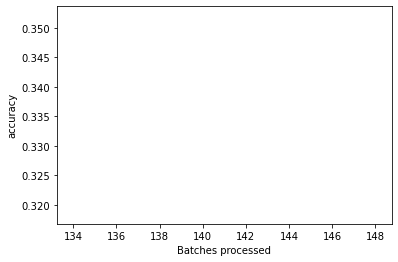

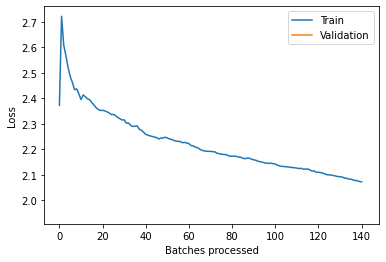

In [ ]:
# hide
# e()

In [ ]:
# e.print_results()

0.001: 0.3352, 


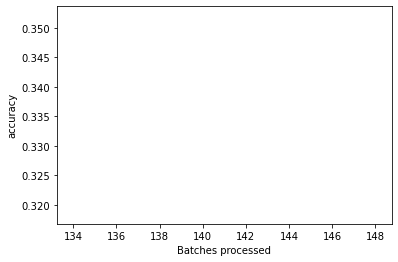

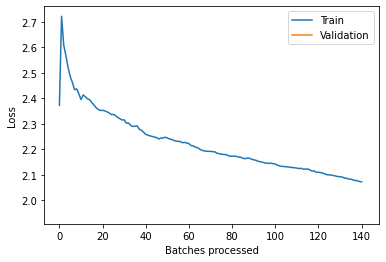

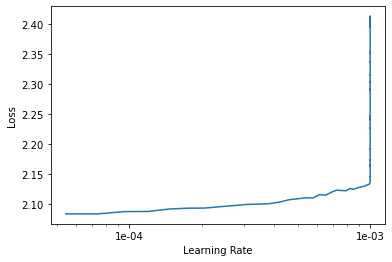

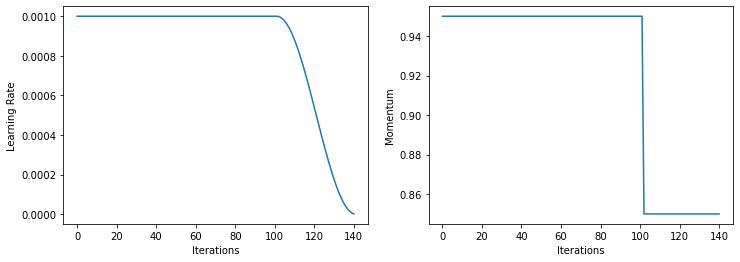

In [ ]:
# e.plot()

In [ ]:
# hide
p.pipeline = [train_fc, plot]

In [ ]:
p.opt = 'ranger'

In [ ]:
# hide
# p.lr = [0.001, 0.002]
# e(2)

run 1 of 2, lr 0.001
repeat 1 of 2


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

epochs: 1, lr: 0.0010, opt - adam


epoch,train_loss,valid_loss,accuracy,time
0,2.044030,1.915509,0.353780,00:19


repeat 2 of 2


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

epochs: 1, lr: 0.0010, opt - adam


epoch,train_loss,valid_loss,accuracy,time
0,2.067456,1.948443,0.334182,00:19


0.001: mean 0.3440 std 0.0098 -- 0.3538, 0.3342, 
--------------------
run 2 of 2, lr 0.002
repeat 1 of 2


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

epochs: 1, lr: 0.0020, opt - adam


epoch,train_loss,valid_loss,accuracy,time
0,2.063343,1.952385,0.327564,00:20


repeat 2 of 2


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

epochs: 1, lr: 0.0020, opt - adam


epoch,train_loss,valid_loss,accuracy,time
0,2.049392,1.923128,0.351489,00:20


0.002: mean 0.3395 std 0.0120 -- 0.3276, 0.3515, 
--------------------


run 1 of 2, lr 0.001
repeat 1 of 2


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

epochs: 1, lr: 0.0010, opt - ranger


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

epoch,train_loss,valid_loss,accuracy,time
0,2.062214,1.912411,0.353525,00:20


/opt/conda/conda-bld/pytorch_1591914855613/work/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of addcmul_ is deprecated:
	addcmul_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcmul_(Tensor tensor1, Tensor tensor2, *, Number value)


repeat 2 of 2


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

epochs: 1, lr: 0.0010, opt - ranger


epoch,train_loss,valid_loss,accuracy,time
0,2.063434,1.942207,0.336472,00:20


0.001: mean 0.3450 std 0.0085 -- 0.3535, 0.3365, 
--------------------
run 2 of 2, lr 0.002
repeat 1 of 2


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

epochs: 1, lr: 0.0020, opt - ranger


epoch,train_loss,valid_loss,accuracy,time
0,2.070572,1.925896,0.347162,00:20


repeat 2 of 2


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

epochs: 1, lr: 0.0020, opt - ranger


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

epoch,train_loss,valid_loss,accuracy,time
0,2.066499,1.918039,0.353016,00:20


0.002: mean 0.3501 std 0.0029 -- 0.3472, 0.3530, 
--------------------


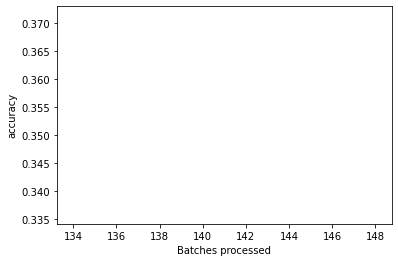

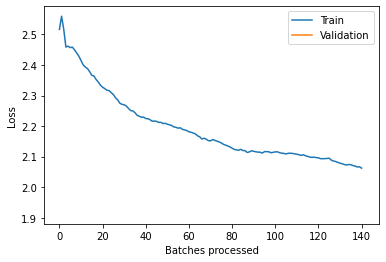

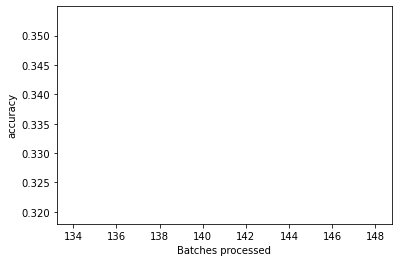

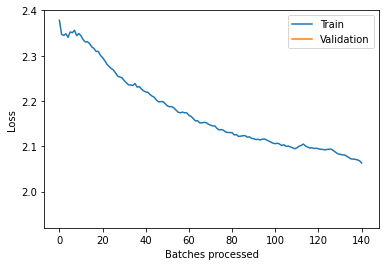

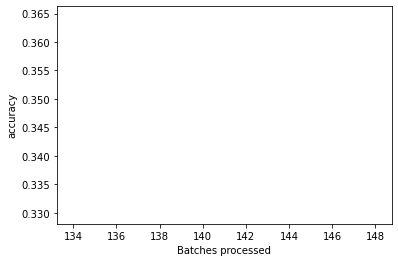

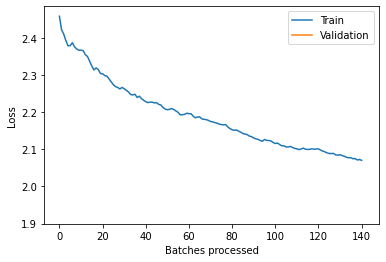

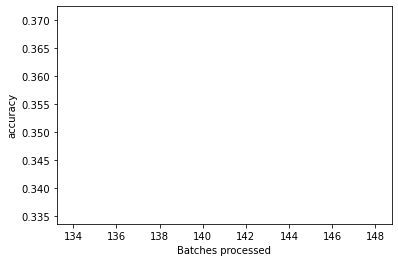

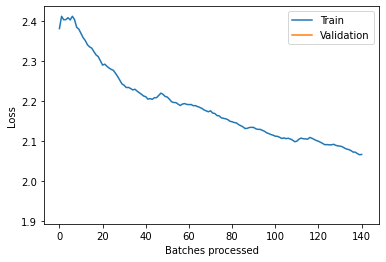

In [ ]:
# hide
# p.lr = [0.001, 0.002]
# e(2)

In [ ]:
# e.print_results()

0.001: mean 0.3450 std 0.0085 -- 0.3535, 0.3365, 
0.002: mean 0.3501 std 0.0029 -- 0.3472, 0.3530, 


# end
by A. Yasyrev

In [ ]:
%nbdev_hide
# from nbdev.export import *
notebook2script()

Converted 00_experiment.ipynb.
Converted 01_utils.ipynb.
Converted 02_consistency.ipynb.
Converted 03_data_imagenette.ipynb.
Converted 50_ranger.ipynb.
Converted index.ipynb.
